1. 분류 모델 평가 지표
- 정확도(Accuracy)
- 정밀도(Precision), 재현율(Recall), F1-score
- Confusion Matrix
- ROC Curve, AUC (이진 분류 성능 곡선)

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


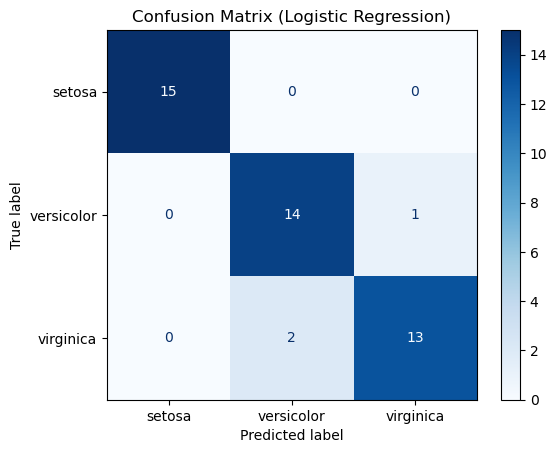

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [3]:
# Confusion Matrix & 분류 리포트(Precision/Recall/F1-score/Support(샘플수))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

clf = LogisticRegression(max_iter=500, multi_class="multinomial")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

ROC Curve : "이진분류" 모델의 성능 평가할때 많이 쓰는 곡선
- x축: FPR(False Positive Rate)
- y축: TPR(True Positive Rate, 재현율=Reall)


=> 임계값 바꿔가며 모델이 양성/음성을 얼마나 잘 구분하는지 보는 그래프



AUC (Area Under the Curve) : ROC Curve 아래 면적 (0.5 ~ 1.0)
- 0.5 : 완전 랜덤 분류
- 1.0 : 완벽한 분류


-> 높을수록 분류 성능 좋다고 해석

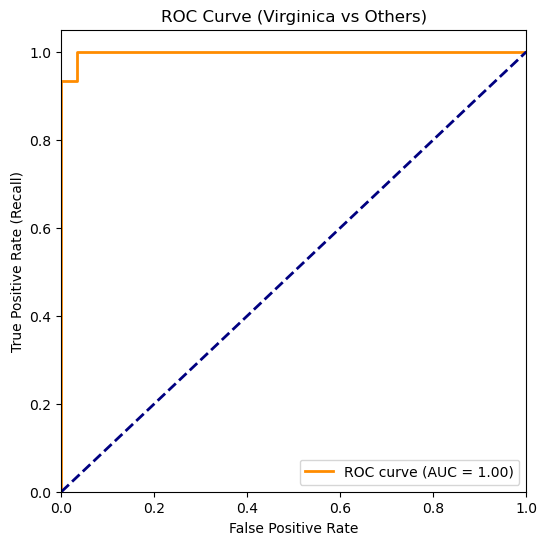

In [1]:
# Iris -> Virginica vs Others 이진분류
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target
y_binary = (y==2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
  X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

# ROC Curve 계산
y_prob = clf.predict_proba(X_test)[:,1] # Virgiinica 확률만 가져오기
"""
.predict : 최종 클래스(라벨)만 반환
.predict_proba : 각 클래스일 확률 반환

ROC Curve에서의
- 임계값 (threshold) : 얼마나 엄격하게 분류했는가 (높을수록 엄격)
- False Positive Rate(오탐률) : 실제 음성 중 양성으로 예측한 비율
- True Positive Rate(=Recall) : 실제 양성 중에 양성으로 예측한 비율
**
- 오탐(False Positive, FP) : 실제로는 음성인데, 모델이 양성이라고 잘못 예측
- 미탐(False Negative, FN) : 실제로는 양성인데, 모델이 음성이라고 잘못 예측
"""
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--") # 랜덤 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (Virginica vs Others)")
plt.legend(loc="lower right")
plt.show()

threshold 엄격(0,0) <-> 느슨(1,1)

쓸데없는 오탐 줄이기가 중요 <-> recall(놓치지 않음)이 중요

ex) 스팸 필터 <-> 환자 진단
- 환자 진단(의료) : 환자를 놓치면 안되니까 tpr 우선
- 스팸 필터 : 정상 메일이 스팸처리되면 안되니까 fpr 우선


AUC는 모델의 전반적인 성능.
but, 완벽한 건 없으니 tpr/fpr 중 뭘 우선할지에 따라 threshold 잡기

<br><br>
2. 교차검증(CV)

In [ ]:
# 3.2